In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deepak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [15]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df=df[['v1','v2']]
df.head()
df['target']=np.where(df['v1']=='spam',1,0)
df=df[['v2','target']]
df=df.rename(index=str,columns={'v2':'text'})
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [20]:
X_train,X_test,y_train,y_test=train_test_split(df['text'],df['target'])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


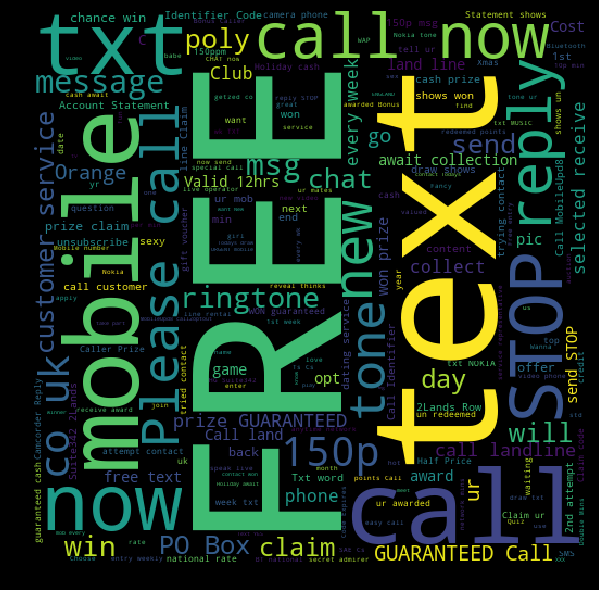

In [28]:
spam_words=''.join(list(df[df['target']==1]['text']))
spam_wc=WordCloud(width=512,height=512).generate(spam_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(0)
plt.show()

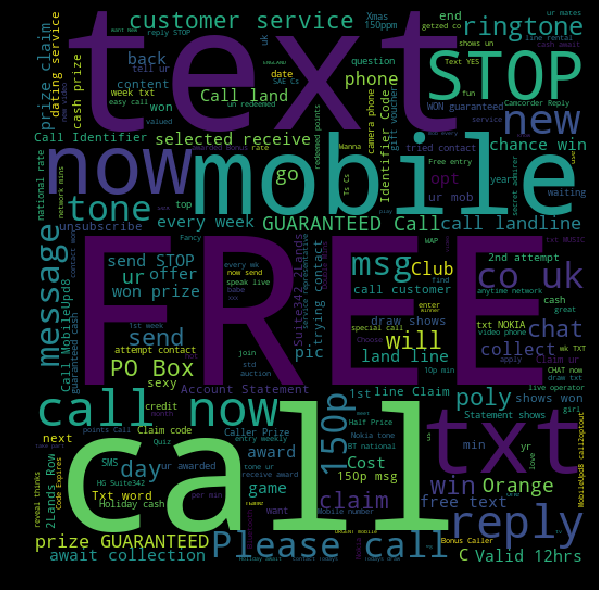

In [29]:
non_spam_words=''.join(list(df[df['target']==0]['text']))
non_spam_wc=WordCloud(width=512,height=512).generate(spam_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(non_spam_wc)
plt.axis('off')
plt.tight_layout(0)
plt.show()

In [101]:
vect1=CountVectorizer().fit(X_train)
X_train_vect1=vect.transform(X_train)
X_test_vect1=vect.transform(X_test)
features=vect.get_feature_names()
lengths=list(map(len,features))
max_index=lengths.index(max(lengths))
min_index=lengths.index(min(lengths))
print(features[max_index])
print(features[min_index])

model1=MultinomialNB(alpha=0.1).fit(X_train_vect,y_train)
predictions=model1.predict(X_test_vect)
print(roc_auc_score(y_test,predictions))

hypotheticalhuagauahahuagahyuhagga
00
0.9669224939237397


In [100]:
vect2=TfidfVectorizer().fit(X_train)
X_train_vect2=vect.transform(X_train)
X_test_vect2=vect.transform(X_test)
features=vect2.get_feature_names()
lengths=list(map(len,features))
max_index=lengths.index(max(lengths))
min_index=lengths.index(min(lengths))
print(features[max_index])
print(features[min_index])

model2=MultinomialNB(alpha=0.01).fit(X_train_vect,y_train)
predictions=model2.predict(X_test_vect)
print(roc_auc_score(y_test,predictions))

hypotheticalhuagauahahuagahyuhagga
00
0.9665065205460359


In [99]:
vect3=CountVectorizer().fit(X_train)
X_train_vect3=vect.transform(X_train)
X_test_vect3=vect.transform(X_test)
features=vect.get_feature_names()
lengths=list(map(len,features))
max_index=lengths.index(max(lengths))
min_index=lengths.index(min(lengths))
print(features[max_index])
print(features[min_index])

model3=SVC(C=10000).fit(X_train_vect,y_train)
predictions=model3.predict(X_test_vect)
print(roc_auc_score(y_test,predictions))

hypotheticalhuagauahahuagahyuhagga
00
0.9494298333493043


In [98]:
vect4=TfidfVectorizer().fit(X_train)
X_train_vect4=vect.transform(X_train)
X_test_vect4=vect.transform(X_test)
features=vect4.get_feature_names()
lengths=list(map(len,features))
max_index=lengths.index(max(lengths))
min_index=lengths.index(min(lengths))
print(features[max_index])
print(features[min_index])

model4=SVC(C=10000).fit(X_train_vect,y_train)
predictions=model4.predict(X_test_vect)
print(roc_auc_score(y_test,predictions))

hypotheticalhuagauahahuagahyuhagga
00
0.9494298333493043


In [97]:
vect=CountVectorizer().fit(X_train)
X_train_vect=vect.transform(X_train)
X_test_vect=vect.transform(X_test)
features=vect.get_feature_names()
lengths=list(map(len,features))
max_index=lengths.index(max(lengths))
min_index=lengths.index(min(lengths))
print(features[max_index])
print(features[min_index])

model=LogisticRegression(C=1000).fit(X_train_vect,y_train)
predictions=model.predict(X_test_vect)
print(roc_auc_score(y_test,predictions))

hypotheticalhuagauahahuagahyuhagga
00
0.9498458067270081


In [96]:
vect5=TfidfVectorizer().fit(X_train)
X_train_vect5=vect.transform(X_train)
X_test_vect5=vect.transform(X_test)
features=vect5.get_feature_names()
lengths=list(map(len,features))
max_index=lengths.index(max(lengths))
min_index=lengths.index(min(lengths))
print(features[max_index])
print(features[min_index])

model5=LogisticRegression(C=1000).fit(X_train_vect,y_train)
predictions=model5.predict(X_test_vect)
print(roc_auc_score(y_test,predictions))
#test=np.array(process_message('hello how are you?'))


hypotheticalhuagauahahuagahyuhagga
00
0.955081408821249


array([1])

In [105]:
test=vect1.transform(['claim this gift'])
model1.predict(test)

array([1, 0])